# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)

610
['porto santo', 'sumbawa', 'bethel', 'san patricio', 'ushuaia', 'dikson', 'hamilton', 'bilma', 'tasiilaq', 'palabuhanratu', 'tiarei', 'cockburn town', 'rikitea', 'thinadhoo', 'kapaa', 'beringovskiy', 'boffa', 'provideniya', 'castro', 'sorvag', 'amderma', 'hilo', 'hermanus', 'busselton', 'salalah', 'barentsburg', 'puerto ayora', 'mar del plata', 'montlucon', 'ilulissat', 'chokurdakh', 'ouallam', 'kodiak', 'barrow', 'polunochnoye', 'tuktoyaktuk', 'puri', 'olinda', 'yellowknife', 'sambava', 'jamestown', 'mataura', 'svetlogorsk', 'pevek', 'wajima', 'sentyabrskiy', 'luwuk', 'carnarvon', 'camana', 'bluff', 'kavieng', 'pingliang', 'bengkulu', 'taolanaro', 'nikolskoye', 'muzo', 'salamiyah', 'evensk', 'the pas', 'ngukurr', 'sabla', 'luderitz', 'palu', 'vaini', 'godinesti', 'punta arenas', 'husavik', 'atuona', 'victor harbor', 'necochea', 'mankono', 'caconda', 'albany', 'port elizabeth', 'cabo san lucas', 'saint-philippe', 'itoman', 'butaritari', 'sao filipe', 'manoel urbano', 'marsabit', 'k

In [14]:
lat_lngs = zip(lats, lngs)
for lat_lng in lat_lngs: 
    print(lat_lng)
    print("---------------")

(31.847020560393346, -14.379723340816724)
---------------
(-9.689732642888856, 117.25375471500558)
---------------
(60.18241808005746, -160.7096998666297)
---------------
(-0.30590485305211246, -115.38292808099007)
---------------
(-85.16031681159551, -22.63136555847376)
---------------
(81.55590561856559, 74.49569562283395)
---------------
(28.956682494835988, -68.951794087738)
---------------
(19.41853757587836, 11.375683876718426)
---------------
(69.4814574405101, -41.765193203701784)
---------------
(-14.33924297905935, 100.9757823632209)
---------------
(-13.21538232316773, -145.52434243760462)
---------------
(29.33827587974183, -71.46875088738693)
---------------
(-41.3365653394418, -112.44164694322512)
---------------
(0.9815623900207839, 70.84515801375045)
---------------
(31.178035417417135, -179.22780189102636)
---------------
(58.850859997038356, 177.0282193946495)
---------------
(10.261792926846681, -13.89739404244176)
---------------
(50.334200792104724, -173.0126346530

---------------
(-68.39023126893348, -84.09114856535732)
---------------
(-80.26570216575388, -95.29386540024753)
---------------
(-43.859055598044364, 125.89802600012285)
---------------
(-4.486827268895695, -115.49586645315074)
---------------
(81.70309378803262, 174.4384712436684)
---------------
(-41.764395451722514, 44.43958530968436)
---------------
(-9.143662341004386, 9.816740987503806)
---------------
(50.59748369993767, 132.779701176714)
---------------
(58.3389222388185, 107.77343968568755)
---------------
(-76.73953406593257, -68.96580404865786)
---------------
(4.582869754706522, 109.16274901300784)
---------------
(75.35238464620198, -34.54103185347856)
---------------
(50.9114931586893, -33.738051415275805)
---------------
(-15.61711129596577, 0.4424296419482232)
---------------
(22.831543436905946, 155.49749335497046)
---------------
(22.037325740611365, 171.7059761718087)
---------------
(74.17766969116121, 132.9299597908896)
---------------
(-5.3637275859441615, -15.5

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
# create url to perform API calls on each city

url = "http://api.openweathermap.org/data/2.5/weather?"+"appid="+api_key+"&units=Imperial"

print(url)

http://api.openweathermap.org/data/2.5/weather?appid=076b87a02cd4ef5abc34d1e9e3a9badb&units=Imperial


In [32]:
# For loop to collect weather data for each city

city_name = []
lat = []
temp = []
max_temp = []
wind_speed = []
humidity = []
cloudiness = []


for city in cities:
        response = requests.get(url + "&q="+ city)
        #print(response.url)
        #print(response.text)
        response = response.json()
        if response['cod'] == 200:
            city_name.append(response["name"])
            lat.append(response["coord"]["lat"])
            temp.append(response['main']['temp'])
            max_temp.append(response['main']['temp_max'])
            wind_speed.append(response["wind"]["speed"])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            print(f"city {city} was found")
        else:
            print(city + " not found")
        
# skip to the next iteration

porto santo not found
sumbawa not found
city bethel was found
city san patricio was found
city ushuaia was found
city dikson was found
city hamilton was found
city bilma was found
city tasiilaq was found
palabuhanratu not found
city tiarei was found
city cockburn town was found
city rikitea was found
city thinadhoo was found
city kapaa was found
city beringovskiy was found
city boffa was found
city provideniya was found
city castro was found
sorvag not found
amderma not found
city hilo was found
city hermanus was found
city busselton was found
city salalah was found
barentsburg not found
city puerto ayora was found
city mar del plata was found
city montlucon was found
city ilulissat was found
city chokurdakh was found
city ouallam was found
city kodiak was found
city barrow was found
city polunochnoye was found
city tuktoyaktuk was found
city puri was found
city olinda was found
city yellowknife was found
city sambava was found
city jamestown was found
city mataura was found
city svetl

city villa rica was found
city praya was found
city poum was found
city ilfracombe was found
city singkang was found
city billings was found
city klaksvik was found
city college was found
city boyolangu was found
city la union was found
city flinders was found
city kavaratti was found
city asosa was found
city matadi was found
city eganville was found
city dingle was found
city kouroussa was found
city malanje was found
city havelock was found
city sao joao da barra was found
city ranong was found
barbar not found
city vangaindrano was found
city port moresby was found
marcona not found
inderborskiy not found
solsvik not found
city salinas was found
city ekhabi was found
city hatillo was found
attawapiskat not found
city castelo do piaui was found
city vila was found
mys shmidta not found
city jaru was found
balykshi not found
city newport was found
city matagami was found
city horqueta was found
city salta was found
city rahuri was found
matameye not found
city aksarka was found
city 

In [27]:
print(city_name)

['Bethel', 'San Patricio', 'Ushuaia', 'Dikson', 'Hamilton', 'Bilma', 'Tasiilaq', 'Tiarei', 'Cockburn Town', 'Rikitea', 'Thinadhoo', 'Kapaa', 'Beringovskiy', 'Boffa', 'Provideniya', 'Castro', 'Hilo', 'Hermanus', 'Busselton', 'Salalah', 'Puerto Ayora', 'Mar del Plata', 'Montlucon', 'Ilulissat', 'Chokurdakh', 'Ouallam', 'Kodiak', 'Barrow', 'Polunochnoye', 'Tuktoyaktuk', 'Puri', 'Olinda', 'Yellowknife', 'Sambava', 'Jamestown', 'Mataura', 'Svetlogorsk', 'Pevek', 'Wajima', 'Luwuk', 'Carnarvon', 'Bluff', 'Kavieng', 'Pingliang', 'Nikolskoye', 'Muzo', 'Salamiyah', 'Evensk', 'The Pas', 'Sabla', 'Luderitz', 'Palu', 'Vaini', 'Godinesti', 'Punta Arenas', 'Husavik', 'Atuona', 'Victor Harbor', 'Necochea', 'Mankono', 'Caconda', 'Albany', 'Port Elizabeth', 'Cabo San Lucas', 'Saint-Philippe', 'Itoman', 'Butaritari', 'Sao Filipe', 'Manoel Urbano', 'Marsabit', 'Khatanga', 'Canavieiras', 'Bredasdorp', 'Anadyr', 'Sao Felix do Xingu', 'Marsh Harbour', 'Saint-Pierre', 'Qasigiannguit', 'Hithadhoo', 'Constituci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
#display DataFrame

weather_dict = {
    "city": city_name,
    "lat": lat,
    "temp": temp,
    "max_temp": max_temp,
    "wind_speed": wind_speed,
    "humidity": humidity,
    "cloudiness": cloudiness
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,temp,max_temp,wind_speed,humidity,cloudiness
0,Bethel,60.79,-13.49,-9.94,6.93,81,90
1,San Patricio,-26.98,76.25,76.25,2.48,96,56
2,Ushuaia,-54.81,41.00,41.00,17.22,93,75
3,Dikson,73.51,20.23,20.23,9.75,95,92
4,Hamilton,32.30,71.60,71.60,19.46,78,75


In [37]:
# save df as csv
weather_data.to_csv("weather_data.csv",index= False)

In [34]:
weather_data.shape

(546, 7)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

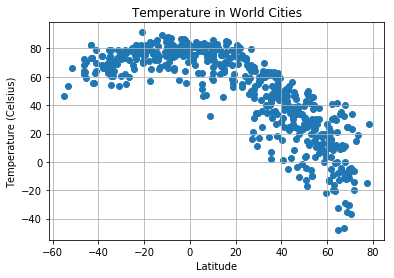

In [31]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

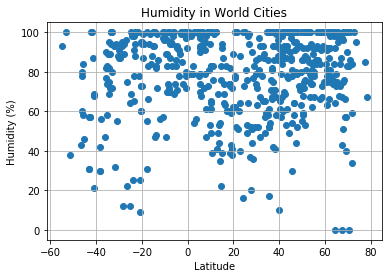

In [35]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

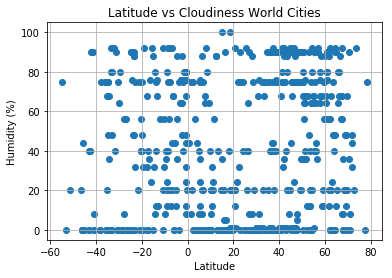

In [36]:
# Build a scatter plot
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvsCloudinessWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

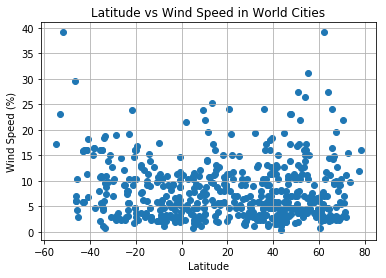

In [38]:
# Build a scatter plot
plt.scatter(weather_data["lat"], weather_data["wind_speed"], marker="o")

# Name graph properties
plt.title("Latitude vs Wind Speed in World Cities")
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvsWindSpeedWorldCities.png")

# Show plot
plt.show()

##Analysis

#*Observed trend 1: Temperatures tend to decline as the Latitude moves away from 0 (equator)
#*Observed trend 2: The highest wind speeds range from +- 40-65 degrees latitude
#*Observed trend 3: Do not see any strong relationship between latitude and cloudiness or as observed in homework sample with strong band of cities sitting at 0, 80 with 100% cloudiness but do see 2 cities with 100% cloudiness near 20 degrees lat. 
